## Preparation for Data (Data Section)

**We start of with Importing Libraries**

In [133]:
!pip install beautifulsoup4
!pip install geopy

In [134]:
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

**First, Get The Names of Major Districts from Wikipedia**

In [135]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Neighborhoods_in_Boston').text
print (type (response_obj))

<class 'str'>


In [136]:
soup = BeautifulSoup(response_obj,'lxml')

In [137]:
name=soup.select('#mw-content-text > div > div.div-col.columns.column-width')
for name in name:
 name=name.text.strip()

In [138]:
print(name)

Allston
Back Bay
Bay Village
Beacon Hill
Brighton
Charlestown
Chinatown/Leather District
Dorchester (divided for planning purposes into Mid Dorchester and Dorchester)
Downtown
East Boston
Fenway Kenmore (includes Longwood)
Hyde Park
Jamaica Plain
Mattapan
Mission Hill
North End
Roslindale
Roxbury
South Boston
South End
West End
West Roxbury


In [139]:
name2=name.split("\n")

In [140]:
df=pd.DataFrame(name2,columns={"Name"})
df.index = np.arange(1, len(df) + 1) # reset the index so that it starts from 1. 
#print (df)
df

,Name
1,Allston
2,Back Bay
3,Bay Village
4,Beacon Hill
5,Brighton
6,Charlestown
7,Chinatown/Leather District
8,Dorchester (divided for planning purposes into...
9,Downtown
10,East Boston


**Rename several neighborhoods name in order to use geopy**

In [141]:
df.loc[[7,8,11],'Name'] = ['Chinatown','Dorchester','Fenway Kenmore']
df

,Name
1,Allston
2,Back Bay
3,Bay Village
4,Beacon Hill
5,Brighton
6,Charlestown
7,Chinatown
8,Dorchester
9,Downtown
10,East Boston


**Get the Coordinates of the Major Districts**

In [157]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(timeout=50)
df['Neighborhoods_Coord']= df['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude) if x else None)

/Users/tianqicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [159]:
df

,Name,Neighborhoods_Coord
1,Allston,"(42.3554344, -71.1321271)"
2,Back Bay,"(42.3507067, -71.0797297)"
3,Bay Village,"(41.4849875, -81.920832)"
4,Beacon Hill,"(42.3587085, -71.067829)"
5,Brighton,"(50.8220399, -0.1374061)"
6,Charlestown,"(43.2387, -72.424622)"
7,Chinatown,"(40.7164913, -73.9962504)"
8,Dorchester,"(50.7116772, -2.4422170980612727)"
9,Downtown,"(37.7875138, -122.407159)"
10,East Boston,"(42.3750973, -71.0392173)"


In [160]:
df[['Latitude', 'Longitude']] = df['Neighborhoods_Coord'].apply(pd.Series)
df

,Name,Neighborhoods_Coord,Latitude,Longitude
1,Allston,"(42.3554344, -71.1321271)",42.355434,-71.132127
2,Back Bay,"(42.3507067, -71.0797297)",42.350707,-71.079730
3,Bay Village,"(41.4849875, -81.920832)",41.484988,-81.920832
4,Beacon Hill,"(42.3587085, -71.067829)",42.358708,-71.067829
5,Brighton,"(50.8220399, -0.1374061)",50.822040,-0.137406
6,Charlestown,"(43.2387, -72.424622)",43.238700,-72.424622
7,Chinatown,"(40.7164913, -73.9962504)",40.716491,-73.996250
8,Dorchester,"(50.7116772, -2.4422170980612727)",50.711677,-2.442217
9,Downtown,"(37.7875138, -122.407159)",37.787514,-122.407159
10,East Boston,"(42.3750973, -71.0392173)",42.375097,-71.039217


In [161]:
df.drop(['Neighborhoods_Coord'], axis=1, inplace=True)
df

,Name,Latitude,Longitude
1,Allston,42.355434,-71.132127
2,Back Bay,42.350707,-71.079730
3,Bay Village,41.484988,-81.920832
4,Beacon Hill,42.358708,-71.067829
5,Brighton,50.822040,-0.137406
6,Charlestown,43.238700,-72.424622
7,Chinatown,40.716491,-73.996250
8,Dorchester,50.711677,-2.442217
9,Downtown,37.787514,-122.407159
10,East Boston,42.375097,-71.039217


**We have the Dataframe with Coordinates**

**But here we see problem with coordinates for some places. So we need to replace them manually.**

**Google search gives the values:**

Bay Village: 42.3490° N, 71.0698° W

Brighton: 42.3464° N, 71.1627° W

Charlestown: 42.3782° N, 71.0602° W

Chinatown: 42.3501° N, 71.0624° W

Dorchester: 42.3016° N, 71.0676° W

Downtown: 42.3557° N, 71.0572° W

Hyde Park: 42.2565° N, 71.1241° W

Mission Hill: 42.3296° N, 71.1062° W

Roxbury: 42.3152° N, 71.0914° W

South Boston: 42.3381° N, 71.0476° W

**Final Data-Frame with Coordinates of the Major District**

In [162]:
df.loc[[3,5,6,7,8,9,12,15,18,19],'Latitude'] = [42.3490,42.3464,42.3782,42.3501,42.3016,42.3557,42.2565,42.3296,42.3152,42.3381]
df.loc[[3,5,6,7,8,9,12,15,18,19],'Longitude']=[-71.0698,-71.1627,-71.0602,-71.0624,-71.0676,-71.0572,-71.1241,-71.1062,- 71.0914,-71.0476]
df

,Name,Latitude,Longitude
1,Allston,42.355434,-71.132127
2,Back Bay,42.350707,-71.079730
3,Bay Village,42.349000,-71.069800
4,Beacon Hill,42.358708,-71.067829
5,Brighton,42.346400,-71.162700
6,Charlestown,42.378200,-71.060200
7,Chinatown,42.350100,-71.062400
8,Dorchester,42.301600,-71.067600
9,Downtown,42.355700,-71.057200
10,East Boston,42.375097,-71.039217


**I'd like to mainly focus on 5 busiest business municipalities of Boston.
These neighbourhoods are**
1. Back Bay
2. Beacon Hill
3. Chinatown
4. Downtown
5. South end

So the Data-Frame with Coordinates can be simplified. 

In [163]:
neighborhoods_list=['Back Bay','Beacon Hill', 'Chinatown', 'Downtown','South End']
df_selected=df.loc[df['Name'].isin(neighborhoods_list)]
df_selected.index = np.arange(1, len(df_selected) + 1)
df_selected

,Name,Latitude,Longitude
1,Back Bay,42.350707,-71.079730
2,Beacon Hill,42.358708,-71.067829
3,Chinatown,42.350100,-71.062400
4,Downtown,42.355700,-71.057200
5,South End,42.341310,-71.077230


Another factor that can guide us later for deciding which district would be best to open a restaurant is, the average land price of neigborhoods. I get this information from ‘Zillow’ web-page. 

**The median list prices per square foot in these neighbourhoods are like this.**

1. Back Bay: $1,256
2. Beacon Hill: $1,245
3. Chinatown: $1,149
4. Downtown: $1,197
5. South end: $1,054

**Add these data in the DataFrame**

In [164]:
df_selected['Median list prices/ft2(USD)']=[1256,1245,1149,1197,1054]
df_selected

/Users/tianqicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Latitude,Longitude,Median list prices/ft2(USD)
1,Back Bay,42.350707,-71.079730,1256
2,Beacon Hill,42.358708,-71.067829,1245
3,Chinatown,42.350100,-71.062400,1149
4,Downtown,42.355700,-71.057200,1197
5,South End,42.341310,-71.077230,1054


In [165]:
# get Boston Latitude and Longitude 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Boston'

geolocator = Nominatim(user_agent="Boston_explorer")
location = geolocator.geocode(address,timeout=5)
Boston_latitude = location.latitude
Boston_longitude = location.longitude
print('The geograpical coordinates of Boston are {}, {}.'.format(Boston_latitude, Boston_longitude))

The geograpical coordinates of Boston are 42.3602534, -71.0582912.


In [166]:
!pip install folium

In [167]:
import folium
# # create map of Most Busy Office Areas of Boston using latitude and longitude values
Boston_5Neighborhoods = folium.Map(location=[Boston_latitude, Boston_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_selected['Latitude'], df_selected['Longitude'], 
                           df_selected['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Boston_5Neighborhoods)  
    
Boston_5Neighborhoods

**Getting Ready to Use FourSquare API**

In [168]:
CLIENT_ID = 'TUUE2PCWBNUCLD15YYTBVAF3PITT0LSVTK0FAPE2ISGAUOTY' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = '1XIVVCVMWSBLUPLFP344NCH2QDKHMUDMYXMWTBWV035EV3OZ' #'your-client-secret' # your Foursquare Secret
VERSION = '20190325' # Foursquare API version

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
My CLIENT_ID: TUUE2PCWBNUCLD15YYTBVAF3PITT0LSVTK0FAPE2ISGAUOTY
My CLIENT_SECRET:1XIVVCVMWSBLUPLFP344NCH2QDKHMUDMYXMWTBWV035EV3OZ


**Exploring the Major Districts**

1.Create the get request url (Foursquare ID and Secret are necessary)
  
  The Number of Venues we will look for is 100 2.a. Radius of Search Would be 1 k.m.
  
2.Create a json from the request object (Need requests Module)

3.Create the lists Containing all the information

4.From the lists create the dataframe.

In [169]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

**Use the Function Above to Create the Dataframe of Venues Around Those 5 Major Districts Belonging to the Busiest District in Boston**

In [170]:
Boston_5_Dist_Venues = getNearbyVenues(names=df_selected['Name'],
                                   latitudes=df_selected['Latitude'],
                                   longitudes=df_selected['Longitude']
                                  )

Back Bay
Beacon Hill
Chinatown
Downtown
South End


In [171]:
print ("Shape of the Venues Dataframe: ", Boston_5_Dist_Venues.shape)
Boston_5_Dist_Venues.tail(5)

Shape of the Venues Dataframe:  (500, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
495,South End,42.34131,-71.07723,Flour Bakery + Cafe,42.348289,-71.073542,Bakery
496,South End,42.34131,-71.07723,Sorellina,42.348718,-71.077984,Italian Restaurant
497,South End,42.34131,-71.07723,Thornton's Restaurant & Cafe,42.345288,-71.082010,Diner
498,South End,42.34131,-71.07723,Gaslight Brasserie,42.340974,-71.067347,French Restaurant
499,South End,42.34131,-71.07723,Kung Fu Tea,42.342588,-71.084086,Bubble Tea Shop


In [172]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Boston_5_Dist_Venues_only_restaurant = Boston_5_Dist_Venues[Boston_5_Dist_Venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Boston_5_Dist_Venues_only_restaurant.index = np.arange(1, len(Boston_5_Dist_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Boston_5_Dist_Venues_only_restaurant.shape)
Boston_5_Dist_Venues_only_restaurant.head()

Shape of the Data-Frame with Venue Category only Restaurant:  (149, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Back Bay,42.350707,-71.07973,Gre.Co,42.349920,-71.081633,Greek Restaurant
2,Back Bay,42.350707,-71.07973,Lolita Cocina & Tequila Bar,42.350563,-71.077544,Mexican Restaurant
3,Back Bay,42.350707,-71.07973,Saltie Girl Seafood Bar,42.351111,-71.077811,Seafood Restaurant
4,Back Bay,42.350707,-71.07973,Atlantic Fish Company,42.349014,-71.081096,Seafood Restaurant
5,Back Bay,42.350707,-71.07973,Sorellina,42.348718,-71.077984,Italian Restaurant


In [173]:
## Show in Map the Top Rated Restaruants in the Top 5 Districts

map_restaurants = folium.Map(location=[Boston_latitude, Boston_longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Back Bay', 'Beacon Hill', 'Chinatown', 'Downtown', 'South End']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Boston_5_Dist_Venues_only_restaurant['Venue_Lat'], 
                                  Boston_5_Dist_Venues_only_restaurant['Venue_Long'], 
                                  Boston_5_Dist_Venues_only_restaurant['Venue_Category'], 
                                  Boston_5_Dist_Venues_only_restaurant['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

In [174]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Boston_5_Dist_Venues['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (Boston_5_Dist_Venues[['Venue_Category']][15:20])

There are 133 unique categories.
                     Venue_Category
15                      Coffee Shop
16               Italian Restaurant
17                             Café
18                       Steakhouse
19  Southern / Soul Food Restaurant


**We have seen that there are 133 unique categories in the Venues Data-Frame.
Let's see the Frequency of Each Category**

In [175]:
print (Boston_5_Dist_Venues['Venue_Category'].value_counts())

Italian Restaurant     22
Coffee Shop            21
American Restaurant    20
Bakery                 15
Seafood Restaurant     14
                       ..
Noodle House            1
Bank                    1
Tapas Restaurant        1
Massage Studio          1
Art Museum              1
Name: Venue_Category, Length: 133, dtype: int64


**Create a Data-frame with the 10 Most Frequently Occuring Venue_Category**

In [176]:
# create a dataframe of top 10 categories
Boston_5_Dist_Venues_Top10 = Boston_5_Dist_Venues['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Boston_5_Dist_Venues_Top10=Boston_5_Dist_Venues_Top10.reset_index()
#Boston_5_Dist_Venues_Top10

Boston_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Boston_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Italian Restaurant,22
1,Coffee Shop,21
2,American Restaurant,20
3,Bakery,15
4,Seafood Restaurant,14
5,Park,14
6,Hotel,13
7,French Restaurant,11
8,Sandwich Place,11
9,Gym,11


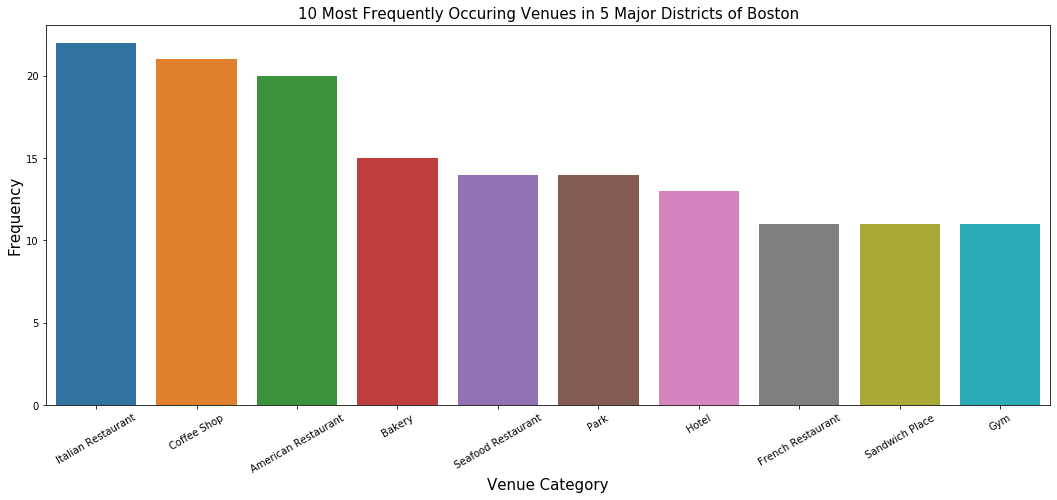

In [177]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Boston_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Districts of Boston', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [178]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Boston_5_Dist_Venues_onehot = pd.get_dummies(Boston_5_Dist_Venues[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
Boston_5_Dist_Venues_onehot['District'] = Boston_5_Dist_Venues['District'] 
### move district column to the first column
fixed_columns = [Boston_5_Dist_Venues_onehot.columns[-1]] + list(Boston_5_Dist_Venues_onehot.columns[:-1])
Boston_5_Dist_Venues_onehot = Boston_5_Dist_Venues_onehot[fixed_columns]
###Boston_5_Dist_Venues_onehot.head(3)

In [179]:
Boston_5_Dist_Venues_Grouped = Boston_5_Dist_Venues_onehot.groupby('District').mean().reset_index()
Boston_5_Dist_Venues_Grouped.index = np.arange(1, len(Boston_5_Dist_Venues_Grouped)+1)
Boston_5_Dist_Venues_Grouped

,District,Accessories Store,American Restaurant,Arepa Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,...,Theater,Tiki Bar,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
1,Back Bay,0.01,0.05,0.00,0.00,0.00,0.01,0.01,0.01,0.00,...,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.00
2,Beacon Hill,0.00,0.05,0.00,0.00,0.01,0.01,0.03,0.00,0.02,...,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02
3,Chinatown,0.00,0.01,0.00,0.00,0.05,0.00,0.05,0.00,0.00,...,0.04,0.01,0.01,0.00,0.01,0.00,0.02,0.01,0.00,0.01
4,Downtown,0.00,0.03,0.00,0.01,0.04,0.01,0.02,0.00,0.02,...,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00
5,South End,0.01,0.06,0.01,0.00,0.01,0.00,0.04,0.00,0.02,...,0.02,0.00,0.00,0.01,0.00,0.00,0.04,0.02,0.00,0.01


In [180]:
num_top_venues = 5

for places in Boston_5_Dist_Venues_Grouped['District']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = Boston_5_Dist_Venues_Grouped[Boston_5_Dist_Venues_Grouped['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Back Bay%%%%%%%%
                 Venue  Freq
0  American Restaurant  0.05
1          Coffee Shop  0.04
2   Seafood Restaurant  0.04
3       Clothing Store  0.04
4                  Spa  0.04


%%%%%%%%%Beacon Hill%%%%%%%%
                 Venue  Freq
0   Italian Restaurant  0.06
1  American Restaurant  0.05
2                Hotel  0.04
3          Pizza Place  0.04
4               Bakery  0.03


%%%%%%%%%Chinatown%%%%%%%%
                Venue  Freq
0    Asian Restaurant  0.05
1  Chinese Restaurant  0.05
2              Bakery  0.05
3         Coffee Shop  0.04
4  Italian Restaurant  0.04


%%%%%%%%%Downtown%%%%%%%%
                     Venue  Freq
0              Coffee Shop  0.06
1            Historic Site  0.06
2       Seafood Restaurant  0.04
3  New American Restaurant  0.04
4           Sandwich Place  0.04


%%%%%%%%%South End%%%%%%%%
                 Venue  Freq
0   Italian Restaurant  0.06
1  American Restaurant  0.06
2          Coffee Shop  0.05
3             Wine Bar  0.0

**Create a DataFrame with Top 10 Venues for Each District**

In [198]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]






num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['District'] = Boston_5_Dist_Venues_Grouped['District']

for ind in np.arange(Boston_5_Dist_Venues_Grouped.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Boston_5_Dist_Venues_Grouped.iloc[ind, :], num_top_venues)

    
District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Back Bay,American Restaurant,Hotel,Spa,Seafood Restaurant,Clothing Store,Coffee Shop,Gym,Gym / Fitness Center,Ice Cream Shop,Restaurant
2,Beacon Hill,Italian Restaurant,American Restaurant,Hotel,Pizza Place,Park,Bakery,French Restaurant,Steakhouse,Coffee Shop,Gym / Fitness Center
3,Chinatown,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Theater,Italian Restaurant,Performing Arts Venue,Seafood Restaurant,Spa,Sandwich Place
4,Downtown,Historic Site,Coffee Shop,Italian Restaurant,New American Restaurant,Sandwich Place,Seafood Restaurant,Asian Restaurant,Park,Gym / Fitness Center,Hotel
5,South End,American Restaurant,Italian Restaurant,Coffee Shop,Wine Bar,French Restaurant,Bakery,Park,Mexican Restaurant,Café,Gym


[24, 25, 29, 35, 36]


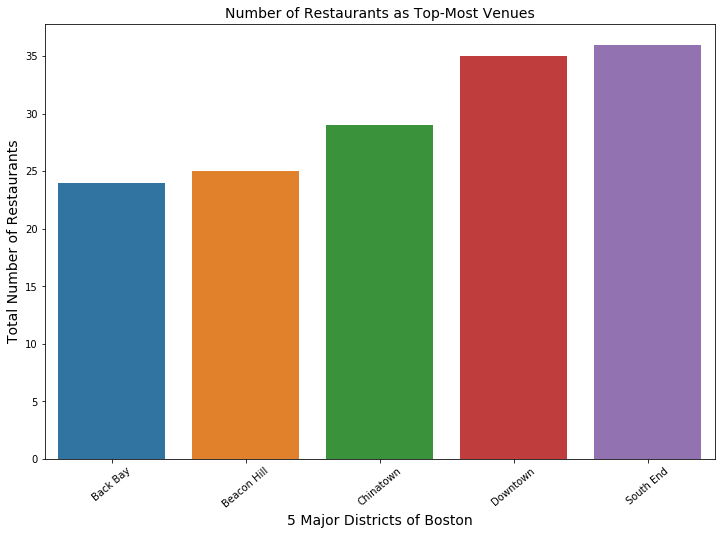

In [182]:
#try groupby to play with restaurant 
Boston_5_Dist_Venues_restaurant = Boston_5_Dist_Venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Boston_5_Dist_Venues_restaurant_df = Boston_5_Dist_Venues_restaurant.to_frame().reset_index()
Boston_5_Dist_Venues_restaurant_df.columns = ['District', 'Number of Restaurant']
#Boston_5_Dist_Venues_restaurant.columns = ['District', 'Number of Restaurant']
#print (type(Boston_5_Dist_Venues_restaurant))
Boston_5_Dist_Venues_restaurant_df.index = np.arange(1, len(Boston_5_Dist_Venues_restaurant_df)+1)

#print ("shape of the dataframe: ", Boston_5_Dist_Venues_restaurant_df.shape)
#print (Boston_5_Dist_Venues_restaurant_df.head(5))
#print (type(Boston_5_Dist_Venues_restaurant_df[['Number of Restaurant']]))
list_rest_no = Boston_5_Dist_Venues_restaurant_df['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='District', y='Number of Restaurant', data=Boston_5_Dist_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("5 Major Districts of Boston", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

**Clustering the Tokyo Districts (Neighborhoods) using K-Means**

In [183]:
from sklearn.cluster import KMeans

In [184]:
# set number of clusters
kclusters = 3

Boston_grouped_clustering = Boston_5_Dist_Venues_Grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5]) 

Check the 5 Cluster labels : [0 1 1 2 1]


In [199]:
# add clustering labels

District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)
District_top10_venues_sorted

,Cluster Label,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,0,Back Bay,American Restaurant,Hotel,Spa,Seafood Restaurant,Clothing Store,Coffee Shop,Gym,Gym / Fitness Center,Ice Cream Shop,Restaurant
2,1,Beacon Hill,Italian Restaurant,American Restaurant,Hotel,Pizza Place,Park,Bakery,French Restaurant,Steakhouse,Coffee Shop,Gym / Fitness Center
3,1,Chinatown,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Theater,Italian Restaurant,Performing Arts Venue,Seafood Restaurant,Spa,Sandwich Place
4,2,Downtown,Historic Site,Coffee Shop,Italian Restaurant,New American Restaurant,Sandwich Place,Seafood Restaurant,Asian Restaurant,Park,Gym / Fitness Center,Hotel
5,1,South End,American Restaurant,Italian Restaurant,Coffee Shop,Wine Bar,French Restaurant,Bakery,Park,Mexican Restaurant,Café,Gym


In [200]:
Boston_5_Dist_Coordinate_Cluster_merged = df_selected

#merge the inital Boston Dataframe with Sorted Most Visited places for each neighborhood

Boston_5_Dist_Coordinate_Cluster_merged = Boston_5_Dist_Coordinate_Cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('District'), on='Name')

Boston_5_Dist_Coordinate_Cluster_merged.head() 

,Name,Latitude,Longitude,Median list prices/ft2(USD),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Back Bay,42.350707,-71.079730,1256,0,American Restaurant,Hotel,Spa,Seafood Restaurant,Clothing Store,Coffee Shop,Gym,Gym / Fitness Center,Ice Cream Shop,Restaurant
2,Beacon Hill,42.358708,-71.067829,1245,1,Italian Restaurant,American Restaurant,Hotel,Pizza Place,Park,Bakery,French Restaurant,Steakhouse,Coffee Shop,Gym / Fitness Center
3,Chinatown,42.350100,-71.062400,1149,1,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Theater,Italian Restaurant,Performing Arts Venue,Seafood Restaurant,Spa,Sandwich Place
4,Downtown,42.355700,-71.057200,1197,2,Historic Site,Coffee Shop,Italian Restaurant,New American Restaurant,Sandwich Place,Seafood Restaurant,Asian Restaurant,Park,Gym / Fitness Center,Hotel
5,South End,42.341310,-71.077230,1054,1,American Restaurant,Italian Restaurant,Coffee Shop,Wine Bar,French Restaurant,Bakery,Park,Mexican Restaurant,Café,Gym


In [214]:
# create map
map_clusters = folium.Map(location=[Boston_latitude, Boston_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Boston_5_Dist_Coordinate_Cluster_merged['Latitude'], 
                                  Boston_5_Dist_Coordinate_Cluster_merged['Longitude'], 
                                  Boston_5_Dist_Coordinate_Cluster_merged['Name'], 
                                  Boston_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [215]:
# create map
map_restaurants10 = folium.Map(location=[Boston_latitude, Boston_longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Districts = ['Back Bay', 'Beacon Hill', 'Chinatown', 'Downtown', 'South End']

# add markers to the map
for lat, lon, poi, cluster in zip(Boston_5_Dist_Coordinate_Cluster_merged['Latitude'], 
                                  Boston_5_Dist_Coordinate_Cluster_merged['Longitude'], 
                                  Boston_5_Dist_Coordinate_Cluster_merged['Name'], 
                                  Boston_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Districts.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

**Explore the 3 Clusters**

cluster 0

In [216]:
Boston_Cluster1 = Boston_5_Dist_Coordinate_Cluster_merged.loc[Boston_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 0, 
                                    Boston_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Boston_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Boston_Cluster1.shape[0]))
Boston_Cluster1

No of Neighbourhood in Cluster Label 0: 1


,Median list prices/ft2(USD),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,1256,0,American Restaurant,Hotel,Spa,Seafood Restaurant,Clothing Store,Coffee Shop,Gym,Gym / Fitness Center,Ice Cream Shop,Restaurant


Cluster1

In [217]:
Boston_Cluster2 = Boston_5_Dist_Coordinate_Cluster_merged.loc[Boston_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 1, 
                                    Boston_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Boston_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Boston_Cluster2.shape[0]))
Boston_Cluster2

No of Neighbourhood in Cluster Label 1: 3


,Median list prices/ft2(USD),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,1245,1,Italian Restaurant,American Restaurant,Hotel,Pizza Place,Park,Bakery,French Restaurant,Steakhouse,Coffee Shop,Gym / Fitness Center
3,1149,1,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Theater,Italian Restaurant,Performing Arts Venue,Seafood Restaurant,Spa,Sandwich Place
5,1054,1,American Restaurant,Italian Restaurant,Coffee Shop,Wine Bar,French Restaurant,Bakery,Park,Mexican Restaurant,Café,Gym


Cluster 2

In [218]:
Boston_Cluster3 = Boston_5_Dist_Coordinate_Cluster_merged.loc[Boston_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 2, 
                                    Boston_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Boston_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(Boston_Cluster3.shape[0]))
Boston_Cluster3

No of Neighbourhood in Cluster Label 2: 1


,Median list prices/ft2(USD),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,1197,2,Historic Site,Coffee Shop,Italian Restaurant,New American Restaurant,Sandwich Place,Seafood Restaurant,Asian Restaurant,Park,Gym / Fitness Center,Hotel
